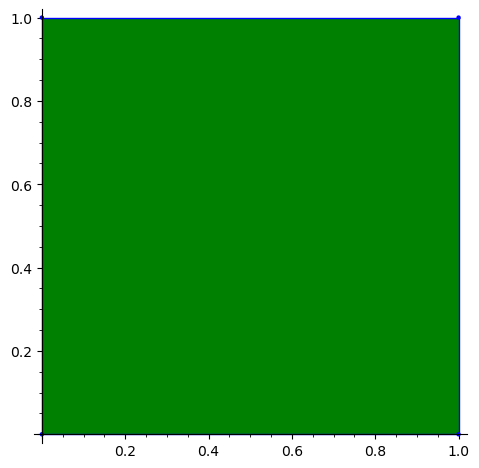

In [2]:
# Checking one example
A = Matrix([[1,2],[3,4]])
B = Matrix([[0, 1],[1,1]])
X0 = Polyhedron(vertices=[(0,0),(1,0),(0,1),(1,1)])
X0.plot()



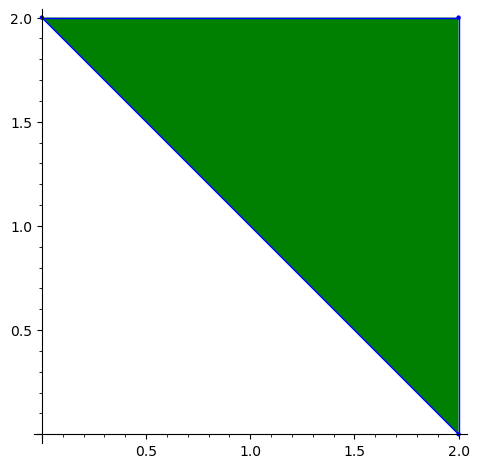

In [3]:
U0 = Polyhedron(vertices=[(0,2),(2,0),(2,1),(2,2)])
U0.plot()

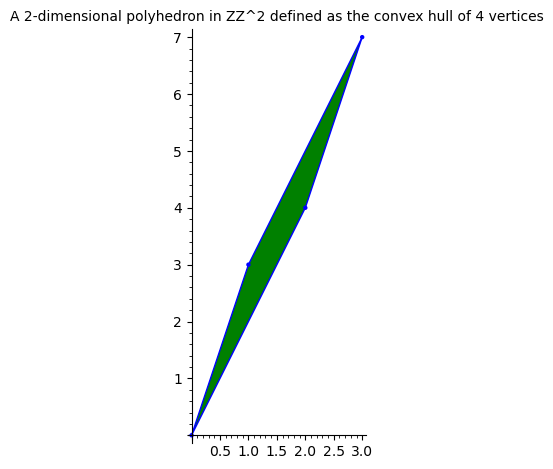

In [4]:
Xc = A*X0
Xc

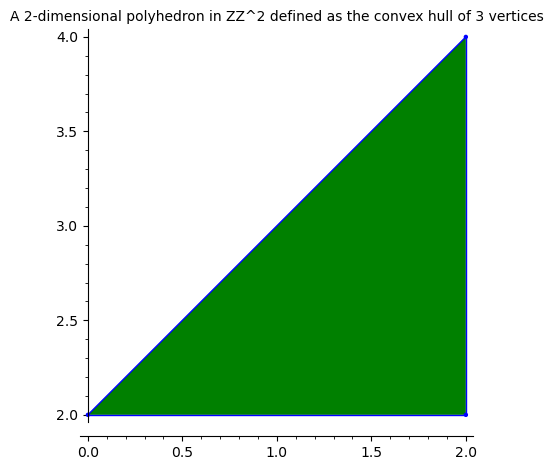

In [5]:
B1 = B*U0
B1

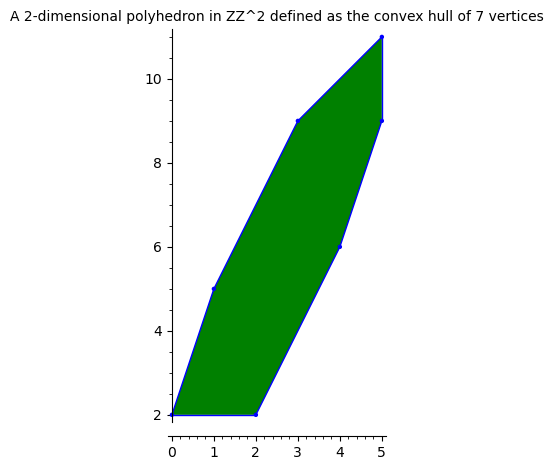

In [6]:
Xp = Xc+B1
Xp

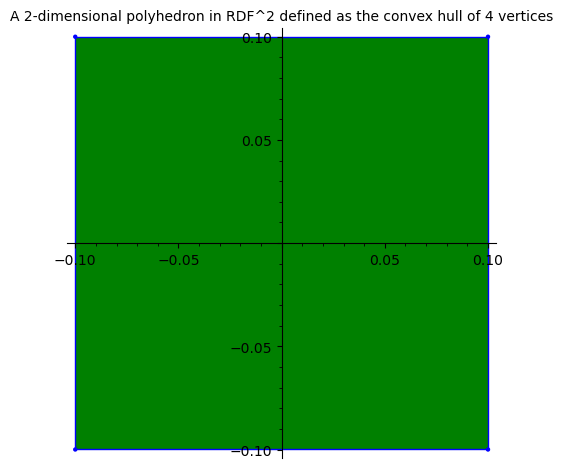

In [7]:
def box(n, ep):
    zeros = [0]*(n+1)
    zeros[0] = ep
    mat = []
    for i in range(2*n):
        mat.append(zeros*1)
    # print(mat)

    for i in range(n):
        mat[i][i+1] = 1
    j = 1
    for i in range(n,2*n):
        mat[i][j] = -1
        j += 1
    Box = Polyhedron(ieqs=mat)
    return Box

Box = box(2, 0.1)
Box

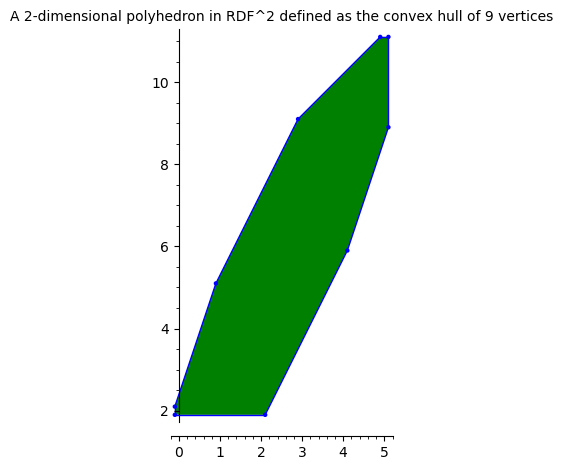

In [8]:
Xp1 = Xp+Box
Xp1

In [9]:
n = 3
Xc = X0
Uc = U0
K = Matrix([[0, 1], [1, 1]])


for i in range(n):
    AXc = A*Xc
    print("AXc = ", AXc)
    BUc = B*Uc
    print("BUc = ", BUc)
    Xc = AXc + BUc
    print('i = ', i)
    print('Xc = ', Xc)
    # print('Box = ', Box)
    Xp = Xc + Box
    print('Xp = ', Xp)
    Uc = K*Xp
    print('Uc = ', Uc)

AXc =  A 2-dimensional polyhedron in ZZ^2 defined as the convex hull of 4 vertices
BUc =  A 2-dimensional polyhedron in ZZ^2 defined as the convex hull of 3 vertices
i =  0
Xc =  A 2-dimensional polyhedron in ZZ^2 defined as the convex hull of 7 vertices
Xp =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 9 vertices
Uc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 9 vertices
AXc =  A 2-dimensional polyhedron in ZZ^2 defined as the convex hull of 7 vertices
BUc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 9 vertices
i =  1
Xc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 15 vertices
Xp =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 19 vertices
Uc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 19 vertices
AXc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hull of 15 vertices
BUc =  A 2-dimensional polyhedron in RDF^2 defined as the convex hul

In [10]:
# We first define some parameters to compute A and B matrices
M = 15 # Mass of the base (kg)
m = 20 # Mass of the object (kg)
J = 4 # Moment of inertia of the object (kgm^2)
l = 0.8 # Distance from the base to the center of mass of the object
c,y = 0.7, 0.2 # co-efficient of viscous friction
g = 9.8 # acceleration due to gravity
Mt = M+m
Jt = J + m*(l**2)
miu = (Mt*Jt) - ((m**2)*(l**2))
a1 = ((m**2)*(l**2)*g)/(miu)
a2 = -((c*Jt)/miu)
a3 = -((y*Jt*l*m)/miu)
a4 = (Mt*m*g*l)/miu
a5 = -((c*l*m)/miu)
a6 = -((y*Mt)/miu)
u1 = (Jt/miu)
u2 = (l*m)/miu

# Hence we have the matrix A and B

A = Matrix([[0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, a1, a2, a3],
            [0, a4, a5, a6]])

B = Matrix([[0],
            [0],
            [u1],
            [u2]])
K = Matrix([0, 1, 0, 1])

print('A = ', A)
print('B = ', B)
print('K = ', K)


A =  [  0.000000000000000   0.000000000000000    1.00000000000000   0.000000000000000]
[  0.000000000000000   0.000000000000000   0.000000000000000    1.00000000000000]
[  0.000000000000000    7.55662650602410 -0.0354216867469880  -0.161927710843374]
[  0.000000000000000    16.5301204819277 -0.0337349397590361 -0.0210843373493976]
B =  [ 0.000000000000000]
[ 0.000000000000000]
[0.0506024096385542]
[0.0481927710843373]
K =  [0 1 0 1]


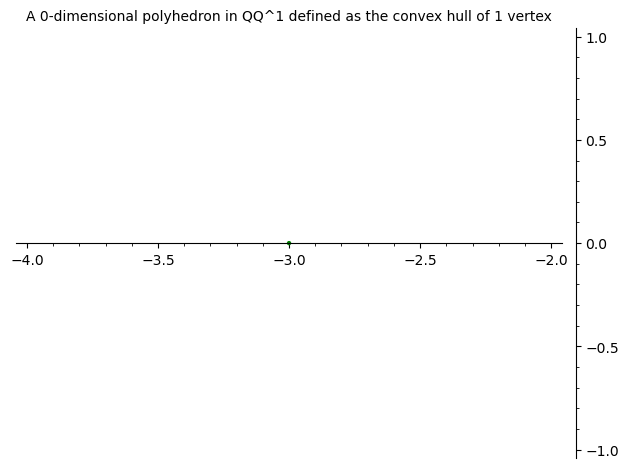

In [11]:
U0 = Polyhedron(eqns=[[3,1]])
U0

In [14]:

Box = box(4, 0.2)
X0 = Polyhedron(vertices = [(4,2,30,0.2)])
U0 = Polyhedron(eqns=[[3,1]])

n = 50
Xc = X0
Uc = U0

for i in range(n):
    print('i = ', i)
    AXc = A*Xc
    print("AXc = ", AXc)
    print('Uc = ', Uc)
    BUc = B*Uc
    print("BUc = ", BUc)
    Xc = AXc + BUc
    print('Xc = ', Xc)
    # print('Box = ', Box)
    Xp = Xc + Box
    print('Xp = ', Xp)
    Uc = K*Xp
    print('Uc = ', Uc)
    print("Cons(Xc) = ", len(list(Xc.Hrepresentation())))
Uc.plot()

i =  0
AXc =  A 0-dimensional polyhedron in RDF^4 defined as the convex hull of 1 vertex
Uc =  A 0-dimensional polyhedron in QQ^1 defined as the convex hull of 1 vertex
BUc =  A 0-dimensional polyhedron in RDF^4 defined as the convex hull of 1 vertex
Xc =  A 0-dimensional polyhedron in RDF^4 defined as the convex hull of 1 vertex
Xp =  A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 16 vertices
Uc =  A 1-dimensional polyhedron in RDF^1 defined as the convex hull of 2 vertices
Cons(Xc) =  4
i =  1
AXc =  A 0-dimensional polyhedron in RDF^4 defined as the convex hull of 1 vertex
Uc =  A 1-dimensional polyhedron in RDF^1 defined as the convex hull of 2 vertices
BUc =  A 1-dimensional polyhedron in RDF^4 defined as the convex hull of 2 vertices
Xc =  A 1-dimensional polyhedron in RDF^4 defined as the convex hull of 2 vertices
Xp =  A 4-dimensional polyhedron in RDF^4 defined as the convex hull of 24 vertices
Uc =  A 1-dimensional polyhedron in RDF^1 defined as the convex 

ValueError: *Error: Numerical inconsistency is found.  Use the GMP exact arithmetic.